# Analyse exploratoire des données

## 1. Dataset du COVID-19

In [25]:
# Import des libraries d'analyse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Chargement du Dataset COVID-19

try:
    covidDataframe = pd.read_csv('data/corona-virus-report/covid_19_clean_complete.csv')
    print("Dataset chargé avec succès")

except FileNotFoundError:
    print("Fichier du Dataset non trouvé, veuillez télécharger le Dataset")

Dataset chargé avec succès


In [ ]:
# Nettoyage des données
print("Nettoyage des données")
print("Forme initiale : ", covidDataframe.shape)

covidDataframe['Date'] = pd.to_datetime(covidDataframe['Date'])
covidDataframe.fillna({'Province/State': 'Unknown'}, inplace=True)

print("Forme après nettoyage : ", covidDataframe.shape)
print("\n5 premiers enregistrements :")
display(covidDataframe.head())

Nettoyage des données
Forme initiale :  (49068, 10)
Forme après nettoyage :  (49068, 10)

5 premiers enregistrements :


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [28]:
# Simple analyse des cas par pays

print("Classement des 10 pays les plus touchés : ")

top_countries = covidDataframe.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max().nlargest(10, 'Confirmed')
display(top_countries)

Classement des 10 pays les plus touchés : 


,Confirmed,Deaths,Recovered
Country/Region,,,
US,4290259,148011,1325804
Brazil,2442375,87618,1846641
India,1480073,33408,951166
Russia,816680,13334,602249
South Africa,452529,7067,274925
Mexico,395489,44022,303810
Peru,389717,18418,272547
Chile,347923,9187,319954
United Kingdom,300111,45759,533


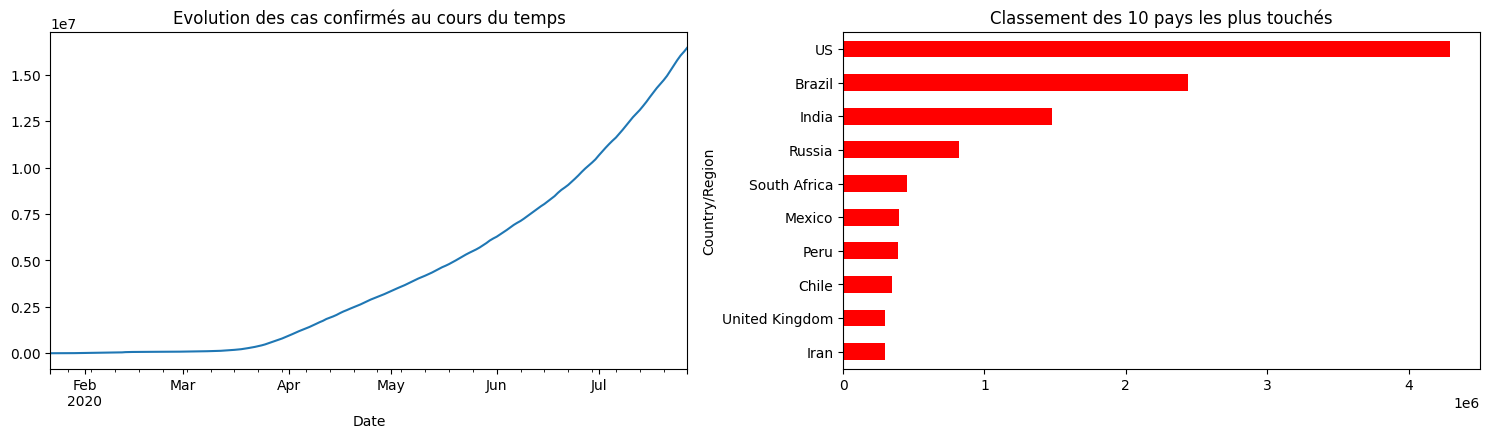

In [29]:
# Affichage de graphiques

plt.figure(figsize=(15, 8))

# Graphique de l'évolution des cas confirmés au cours du temps

plt.subplot(2, 2, 1)
covidDataframe.groupby('Date')['Confirmed'].sum().plot(title='Evolution des cas confirmés au cours du temps')

# Graphique du classement des pays les plus touchés

plt.subplot(2, 2, 2)
top_countries['Confirmed'].sort_values().plot(kind='barh', color='red')
plt.title('Classement des 10 pays les plus touchés')

plt.tight_layout()
plt.show()

## 2. Dataset MonkeyPox

In [30]:
# Chargement du Dataset MonkeyPox

try:
    mpoxDataframe = pd.read_csv('data/mpox/owid-monkeypox-data.csv')
    print("Dataset chargé avec succès")

except FileNotFoundError:
    print("Fichier du Dataset non trouvé, veuillez télécharger le Dataset")

Dataset chargé avec succès


In [31]:
# Nettoyage des données
print("Nettoyage des données")
print("Forme initiale : ", mpoxDataframe.shape)

mpoxDataframe['date'] = pd.to_datetime(mpoxDataframe['date'])

# Filtrer les données par pays et non par continent
mpoxDataframe = mpoxDataframe[~mpoxDataframe['location'].isin(['North America', 'South America', 'Africa', 'Asia', 'Europe', 'Oceania'])]

#covidDataframe['Date'] = pd.to_datetime(covidDataframe['Date'])
#covidDataframe.fillna({'Province/State': 'Unknown'}, inplace=True)

#print("Forme après nettoyage : ", covidDataframe.shape)
#print("\n5 premiers enregistrements :")
display(mpoxDataframe.head())
mpoxDataframe.info()

Nettoyage des données
Forme initiale :  (33666, 15)


,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
370,Andorra,AND,2022-07-25,2.0,0.0,2.0,0.0,0.29,0.0,25.049,25.049,3.632,0.0,0.0,0.0
371,Andorra,AND,2022-07-26,3.0,0.0,1.0,0.0,0.43,0.0,12.525,37.574,5.386,0.0,0.0,0.0
372,Andorra,AND,2022-07-27,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.574,5.386,0.0,0.0,0.0
373,Andorra,AND,2022-07-28,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.574,5.386,0.0,0.0,0.0
374,Andorra,AND,2022-07-29,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.574,5.386,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 31523 entries, 370 to 33665
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         31523 non-null  object        
 1   iso_code                         31523 non-null  object        
 2   date                             31523 non-null  datetime64[ns]
 3   total_cases                      31523 non-null  float64       
 4   total_deaths                     31523 non-null  float64       
 5   new_cases                        31523 non-null  float64       
 6   new_deaths                       31523 non-null  float64       
 7   new_cases_smoothed               31523 non-null  float64       
 8   new_deaths_smoothed              31523 non-null  float64       
 9   new_cases_per_million            31523 non-null  float64       
 10  total_cases_per_million          31523 non-null  float64     